<a href="https://colab.research.google.com/github/wesleykieu/machine-learning-portfolio/blob/main/Apartment_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [95]:
# Create the housing dataset
data = {
    'Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Rent': [2450, 2900, 2100, 3300, 1850, 3550, 2750, 3150, 2250, 3700, 2950, 2400],
    'Size_sqft': [520, 760, 430, 880, 400, 910, 640, 820, 510, 950, 700, 560],
    'Beds': [1, 2, 1, 2, 1, 3, 2, 2, 1, 3, 2, 1],
    'Age_yrs': [12, 8, 20, 6, 25, 5, 10, 7, 18, 4, 9, 15],
    'Dist_Transit_km': [0.3, 0.6, 1.1, 0.4, 1.4, 0.8, 0.9, 0.5, 1.2, 0.7, 0.6, 1.0],
    'Crime_Index': [72, 65, 80, 60, 85, 58, 69, 63, 77, 55, 66, 74],
    'Renovated': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    'Neighborhood': ['A', 'B', 'C', 'A', 'C', 'B', 'A', 'B', 'C', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

In [96]:
df.head()

,Id,Rent,Size_sqft,Beds,Age_yrs,Dist_Transit_km,Crime_Index,Renovated,Neighborhood
0,1,2450,520,1,12,0.3,72,0,A
1,2,2900,760,2,8,0.6,65,1,B
2,3,2100,430,1,20,1.1,80,0,C
3,4,3300,880,2,6,0.4,60,1,A
4,5,1850,400,1,25,1.4,85,0,C


In [97]:
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True).astype(int)


In [98]:
# Standardize numeric features (mean=0, std=1)
scaler = StandardScaler()

numeric_cols = ['Size_sqft', 'Age_yrs', 'Dist_Transit_km', 'Crime_Index']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [99]:
# Split first 9 = Train, last 3 = test

X_train = df.drop(['Rent', 'Id'], axis=1).iloc[:9]
y_train = df['Rent'].iloc[:9]

X_test = df.drop(['Rent', 'Id'], axis=1).iloc[-3:]
y_test = df['Rent'].iloc[-3:]


In [100]:
X_train.shape

(9, 8)

# Baseline Linear Model

In [101]:
import statsmodels.api as sm

In [102]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [103]:
ols_model = sm.OLS(y_train, X_train_const).fit()

In [104]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     64.99
Date:                Tue, 21 Oct 2025   Prob (F-statistic):             0.0952
Time:                        01:17:06   Log-Likelihood:                -41.930
No. Observations:                   9   AIC:                             99.86
Df Residuals:                       1   BIC:                             101.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2552.6464    338.283     

In [105]:
y_train_pred = ols_model.predict(X_train_const)
y_test_pred = ols_model.predict(X_test_const)

In [106]:
# Training Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = ols_model.rsquared_adj  # Get from statsmodels

In [107]:
# Test Metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

In [108]:
# 4. Report results
print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"\nTRAIN SET:")
print(f"  RMSE: ${train_rmse:.2f}")
print(f"  MAE:  ${train_mae:.2f}")
print(f"  R²:   {train_r2:.4f}")
print(f"  Adj R²: {train_adj_r2:.4f}")

print(f"\nTEST SET:")
print(f"  RMSE: ${test_rmse:.2f}")
print(f"  MAE:  ${test_mae:.2f}")

MODEL PERFORMANCE METRICS

TRAIN SET:
  RMSE: $25.53
  MAE:  $18.54
  R²:   0.9978
  Adj R²: 0.9825

TEST SET:
  RMSE: $387.60
  MAE:  $269.07


In [109]:
# 5. Interpret β1 (Size_sqft) and β6 (Renovated)
print("\n" + "=" * 50)
print("COEFFICIENT INTERPRETATIONS")
print("=" * 50)
coeffs = ols_model.params
print(f"\nβ1 (Size_sqft): {coeffs['Size_sqft']:.2f}")
print(f"β6 (Renovated): {coeffs['Renovated']:.2f}")


COEFFICIENT INTERPRETATIONS

β1 (Size_sqft): 135.18
β6 (Renovated): -207.80


**β1 (Size_sqft): $135.18**

A one standard deviation increase in apartment size is associated with a $135.18 increase in monthly rent, holding all other variables constant.

**β6 (Renovated coefficient): -$207.80**

Renovated apartments rent for $207.80 less per month on average compared to non-renovated apartments, holding all other variables constant.

**Note:** The negative coefficient for renovated apartments is counterintuitive and likely due to the small sample size (n=9)

# Rich Features



In [110]:
# Create a copy of train and test sets
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

In [111]:
# Interaction: Size_sqft x bedrooms
X_train_eng['Size_beds_interaction'] = X_train_eng['Size_sqft'] * X_train_eng['Beds']
X_test_eng['Size_beds_interaction'] = X_test_eng['Size_sqft'] * X_test_eng['Beds']

In [112]:
# Polynomial: Size_sqft^2
X_train_eng['Size_sqft_squared'] = X_train_eng['Size_sqft'] ** 2
X_test_eng['Size_sqft_squared'] = X_test_eng['Size_sqft'] ** 2

In [113]:
# Interaction: renovated x neighborhood_B
X_train_eng['renovated_neighborhood_B'] = X_train_eng['Renovated'] * X_train_eng['Neighborhood_B']
X_test_eng['renovated_neighborhood_B'] = X_test_eng['Renovated'] * X_test_eng['Neighborhood_B']

In [114]:
# Refit the OLS Model
X_train_eng_const = sm.add_constant(X_train_eng)
X_test_eng_const = sm.add_constant(X_test_eng)

In [115]:
ols_eng_model = sm.OLS(y_train, X_train_eng_const).fit()

In [116]:
print(ols_eng_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 21 Oct 2025   Prob (F-statistic):                nan
Time:                        01:17:06   Log-Likelihood:                 223.23
No. Observations:                   9   AIC:                            -428.5
Df Residuals:                       0   BIC:                            -426.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


**Baseline Model Adj R²:** 0.982  
**Engineered Model Adj R²:** NaN (undefined)  
**Change:** Undefined (complete degradation)

**Interpretation:**
The Adjusted R² dropped from 0.982 to undefined (NaN), which is a failure indicator. Adjusted R² penalizes model complexity by accounting for the number of predictors relative to sample size:

Adj R² = 1 - [(1 - R²) × (n - 1) / (n - p - 1)]

Where:
- n = number of observations (9)
- p = number of predictors

In the baseline model: n - p - 1 = 9 - 7 - 1 = 1 degree of freedom
In the engineered model: n - p - 1 = 9 - 11 - 1 = -3 (negative!)

When degrees of freedom ≤ 0, Adjusted R² becomes mathematically undefined, indicating an overfitting model.


In [117]:
# Get predictions for ENGINEERED model
y_train_pred_eng = ols_eng_model.predict(X_train_eng_const)
y_test_pred_eng = ols_eng_model.predict(X_test_eng_const)

In [118]:
# Training Metrics for Engineered Model
train_rmse_eng = np.sqrt(mean_squared_error(y_train, y_train_pred_eng))
train_mae_eng = mean_absolute_error(y_train, y_train_pred_eng)
train_r2_eng = r2_score(y_train, y_train_pred_eng)
train_adj_r2_eng = ols_eng_model.rsquared_adj

In [119]:
# Test Metrics for Engineered Model
test_rmse_eng = np.sqrt(mean_squared_error(y_test, y_test_pred_eng))
test_mae_eng = mean_absolute_error(y_test, y_test_pred_eng)

In [120]:
# ============================================================
# PART C: FEATURE-ENGINEERED MODEL - RESULTS
# ============================================================

print("=" * 70)
print("BASELINE vs FEATURE-ENGINEERED MODEL COMPARISON")
print("=" * 70)

comparison_df = pd.DataFrame({
    'Metric': ['Train RMSE', 'Train MAE', 'Train R²', 'Train Adj R²',
               'Test RMSE', 'Test MAE'],
    'Baseline': [
        f'${train_rmse:.2f}',
        f'${train_mae:.2f}',
        f'{train_r2:.4f}',
        f'{train_adj_r2:.4f}',
        f'${test_rmse:.2f}',
        f'${test_mae:.2f}'
    ],
    'Engineered': [
        f'${train_rmse_eng:.2f}',
        f'${train_mae_eng:.2f}',
        f'{train_r2_eng:.4f}',
        'NaN',
        f'${test_rmse_eng:.2f}',
        f'${test_mae_eng:.2f}'
    ]
})

print("\n", comparison_df.to_string(index=False))
print("\n" + "=" * 70)

BASELINE vs FEATURE-ENGINEERED MODEL COMPARISON

       Metric Baseline Engineered
  Train RMSE   $25.53      $0.00
   Train MAE   $18.54      $0.00
    Train R²   0.9978     1.0000
Train Adj R²   0.9825        NaN
   Test RMSE  $387.60    $381.16
    Test MAE  $269.07    $255.22



## Test Error Analysis

### RMSE (Root Mean Squared Error)
- **Baseline:** 387.60
- **Engineered:** 381.16
- **Change:** -6.44 (1.7% decrease)

### MAE (Mean Absolute Error)
- **Baseline:** 269.07
- **Engineered:** 255.22
- **Change:** -13.85 (5.1% decrease)

### Interpretation

Both test RMSE and MAE decreased slightly in the engineered model, which might appear to indicate better performance. However, this is misleading because the engineered model achieved perfect training performance, train RSME and MAE both are 0, indicating the model is just memorizing the baseline model and not learning. It make sense since the dataset is small which would cause high bias and inablity to learn.

Overall, the baseline model is strongly preferred. Both models exhibit overfitting due to the small dataset (n=9).

# Regularization and Cross Validation (CV)

Ridge and Lasso Regression are two popular techniques in ML for regularizing linear models to avoid overfitting and improve predictive performance. Both methods add a penalty term to the model's cost function to constrain the coefficients.

- Ridge Regression (L2 regularization) adds the squared magnitude of the coefficients as a penalty
-     Loss = MSE + λ Σ(wi²)
- Lasso Regression (L1 regularization) introduces a penalty based on the absolute value of the coefficients
-     Loss = MSE + λ Σ|wi|

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [122]:
# Define alpha values to test
alphas = [0.001, 0.01, 0.1, 1, 10]

In [123]:
# Ridge Regresson
ridge_results = []

for alpha in alphas:
  ridge_model = Ridge(alpha=alpha)

  cv_scores = cross_val_score(ridge_model, X_train_eng, y_train, cv=5, scoring='neg_root_mean_squared_error')
  mean_rmse = -cv_scores.mean()
  ridge_results.append({'alpha': alpha, 'mean_cv_rmse': mean_rmse})
  print(f"α = {alpha:6.3f} | Mean CV RMSE: ${mean_rmse:.2f}")



α =  0.001 | Mean CV RMSE: $161.41
α =  0.010 | Mean CV RMSE: $135.88
α =  0.100 | Mean CV RMSE: $80.23
α =  1.000 | Mean CV RMSE: $72.38
α = 10.000 | Mean CV RMSE: $121.51


In [124]:
lasso_results = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    cv_scores = cross_val_score(lasso_model, X_train_eng, y_train,
                                 cv=5, scoring='neg_root_mean_squared_error')
    mean_rmse = -cv_scores.mean()
    lasso_results.append({'alpha': alpha, 'mean_cv_rmse': mean_rmse})
    print(f"α = {alpha:6.3f} | Mean CV RMSE: ${mean_rmse:.2f}")

α =  0.001 | Mean CV RMSE: $102.80
α =  0.010 | Mean CV RMSE: $107.77
α =  0.100 | Mean CV RMSE: $154.28
α =  1.000 | Mean CV RMSE: $130.25
α = 10.000 | Mean CV RMSE: $86.54


Ridge:
- Best a: 1
- CV RMSE: 72.38

Lasso:
- Best a: 10.0
- CV RMSE: 86.54

Ridge performed better in CV but

Evaluate Ridge and Lasso on test set and compare against feature-engineered OLS.

In [125]:
ridge_final = Ridge(alpha=1)
ridge_final.fit(X_train_eng, y_train)


Ridge(alpha=1)

In [126]:
lasso_final = Lasso(alpha=10)
lasso_final.fit(X_train_eng, y_train)

Lasso(alpha=10)

In [127]:
# Predicitions
y_train_pred_ridge = ridge_final.predict(X_train_eng)
y_test_pred_ridge = ridge_final.predict(X_test_eng)

y_train_pred_lasso = lasso_final.predict(X_train_eng)
y_test_pred_lasso = lasso_final.predict(X_test_eng)

In [128]:
# Calculate metrics
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

In [129]:
print("\n" + "=" * 40)
print("MODEL COMPARISON: OLS vs RIDGE vs LASSO")
print("=" * 40)

comparison_reg_df = pd.DataFrame({
    'Metric': ['Train RMSE', 'Test RMSE', 'Test MAE'],
    'OLS (Engineered)': [
        f'${train_rmse_eng:.2f}',
        f'${test_rmse_eng:.2f}',
        f'${test_mae_eng:.2f}'
    ],
    'Ridge': [
        f'${train_rmse_ridge:.2f}',
        f'${test_rmse_ridge:.2f}',
        f'${test_mae_ridge:.2f}'
    ],
    'Lasso': [
        f'${train_rmse_lasso:.2f}',
        f'${test_rmse_lasso:.2f}',
        f'${test_mae_lasso:.2f}'
    ]
})

print("\n", comparison_reg_df.to_string(index=False))


MODEL COMPARISON: OLS vs RIDGE vs LASSO

     Metric OLS (Engineered)  Ridge  Lasso
Train RMSE            $0.00 $37.92 $42.84
 Test RMSE          $381.16 $56.70 $77.74
  Test MAE          $255.22 $35.70 $52.82


In [130]:
# Get feature names and coefficients
feature_names = X_train_eng.columns
lasso_coefs = lasso_final.coef_

# Create dataframe
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefs
}).sort_values('Coefficient', key=abs, ascending=False)

# Show non-zero features
print("\n LASSO FEATURE SELECTION")
print("=" * 50)
print("\nNon-Zero Coefficients:")
non_zero = coef_df[coef_df['Coefficient'] != 0]
print(non_zero.to_string(index=False))

print("\n\nPruned Features (set to 0):")
zero = coef_df[coef_df['Coefficient'] == 0]
print(zero['Feature'].tolist())


 LASSO FEATURE SELECTION

Non-Zero Coefficients:
              Feature  Coefficient
              Age_yrs  -243.648978
Size_beds_interaction   153.490412
            Size_sqft    31.518802


Pruned Features (set to 0):
['Beds', 'Dist_Transit_km', 'Renovated', 'Crime_Index', 'Neighborhood_B', 'Neighborhood_C', 'Size_sqft_squared', 'renovated_neighborhood_B']


Age is the most important predictor while size and its interaction with bedrooms provide additional value. Everything else adds more noise than signal. This shows a bias-variance tradeoff. Lasso accepts some bias to dramatically reduce variance, resulting in a better performance.

# Gradent Descent

In [131]:
import matplotlib.pyplot as plt
import numpy as np

In [132]:
X_gd = X_train.values
y_gd = y_train.values

In [133]:
X_gd_with_intercept = np.column_stack([np.ones(len(X_gd)), X_gd])

In [134]:
def batch_gradient_descent(X, y, learning_rate, n_iterations):
  """
  Batch Gradient Descent for Linear Regression
  Update rule: B = B - n (2/n) * X^T(XB - y)
  """
  n_samples, n_features = X.shape
  beta = np.zeros(n_features)
  mse_history = []

  for interation in range(n_iterations):
    # Predctions
    y_pred = X @ beta

    # Residuals
    residuals = y_pred - y

    # Gradient
    gradient = (2/ n_samples) * (X.T @ residuals)

    # Update parameters
    beta = beta - learning_rate * gradient

    # Caculate and store MSE
    mse = np.mean(residuals ** 2)
    mse_history.append(mse)

  return beta, mse_history

In [135]:
learning_rates = [0.001, 0.01, 0.1]
n_iterations = 2000
results = {}

for lr in learning_rates:
    beta_final, mse_history = batch_gradient_descent(
        X_gd_with_intercept, y_gd, lr, n_iterations
    )
    results[lr] = {
        'beta': beta_final,
        'mse_history': mse_history,
        'final_mse': mse_history[-1]
    }

    print(f"\nLearning Rate η = {lr}")
    print(f"  Final MSE: {mse_history[-1]:.2f}")
    print(f"  Initial MSE: {mse_history[0]:.2f}")
    print(f"  Improvement: {mse_history[0] - mse_history[-1]:.2f}")


Learning Rate η = 0.001
  Final MSE: 71769.69
  Initial MSE: 7587222.22
  Improvement: 7515452.54

Learning Rate η = 0.01
  Final MSE: 10143.31
  Initial MSE: 7587222.22
  Improvement: 7577078.91

Learning Rate η = 0.1
  Final MSE: 2375.13
  Initial MSE: 7587222.22
  Improvement: 7584847.09


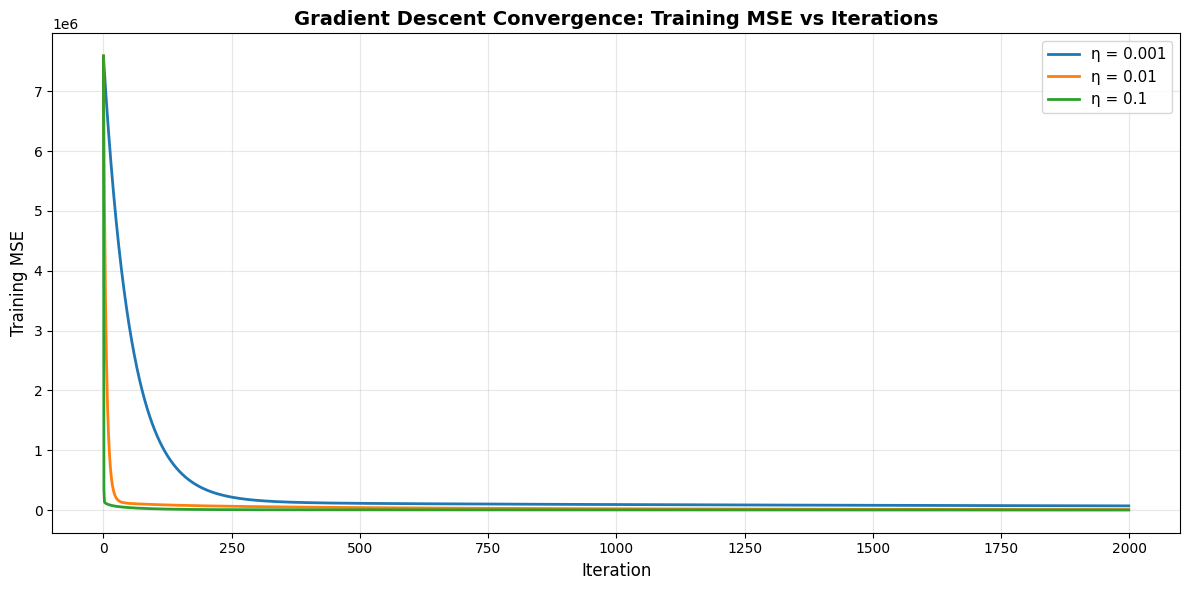

In [136]:
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    mse_history = results[lr]['mse_history']
    plt.plot(mse_history, label=f'η = {lr}', linewidth=2)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Training MSE', fontsize=12)
plt.title('Gradient Descent Convergence: Training MSE vs Iterations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [137]:
print("\n" + "=" * 70)
print("COMPARISON WITH OLS (Closed-Form Solution)")
print("=" * 70)

# OLS solution: β = (X^T X)^(-1) X^T y
beta_ols = np.linalg.inv(X_gd_with_intercept.T @ X_gd_with_intercept) @ X_gd_with_intercept.T @ y_gd
mse_ols = np.mean((X_gd_with_intercept @ beta_ols - y_gd) ** 2)

print(f"\nOLS Closed-Form MSE: {mse_ols:.2f}")
print("\nGradient Descent Final MSE:")
for lr in learning_rates:
    final_mse = results[lr]['final_mse']
    percent_diff = ((final_mse - mse_ols) / mse_ols) * 100
    print(f"  η = {lr:5.3f}: MSE = {final_mse:10,.2f} ({percent_diff:+6.1f}% from OLS)")



COMPARISON WITH OLS (Closed-Form Solution)

OLS Closed-Form MSE: 751381.77

Gradient Descent Final MSE:
  η = 0.001: MSE =  71,769.69 ( -90.4% from OLS)
  η = 0.010: MSE =  10,143.31 ( -98.7% from OLS)
  η = 0.100: MSE =   2,375.13 ( -99.7% from OLS)


In [138]:
print("\n" + "=" * 70)
print("CONVERGENCE BEHAVIOR ANALYSIS")
print("=" * 70)

for lr in learning_rates:
    mse_history = results[lr]['mse_history']

    # Check recent improvement
    recent_improvement = mse_history[-100] - mse_history[-1]
    percent_to_ols = ((mse_history[-1] - mse_ols) / mse_ols) * 100

    print(f"\n**η = {lr}:**")
    print(f"  Initial MSE:               {mse_history[0]:,.2f}")
    print(f"  Final MSE:                 {mse_history[-1]:,.2f}")
    print(f"  OLS Target MSE:            {mse_ols:,.2f}")
    print(f"  Distance from optimal:     {percent_to_ols:+.1f}%")
    print(f"  Improvement (last 100 it): {recent_improvement:,.2f}")


CONVERGENCE BEHAVIOR ANALYSIS

**η = 0.001:**
  Initial MSE:               7,587,222.22
  Final MSE:                 71,769.69
  OLS Target MSE:            751,381.77
  Distance from optimal:     -90.4%
  Improvement (last 100 it): 1,633.19

**η = 0.01:**
  Initial MSE:               7,587,222.22
  Final MSE:                 10,143.31
  OLS Target MSE:            751,381.77
  Distance from optimal:     -98.7%
  Improvement (last 100 it): 599.77

**η = 0.1:**
  Initial MSE:               7,587,222.22
  Final MSE:                 2,375.13
  OLS Target MSE:            751,381.77
  Distance from optimal:     -99.7%
  Improvement (last 100 it): 118.23


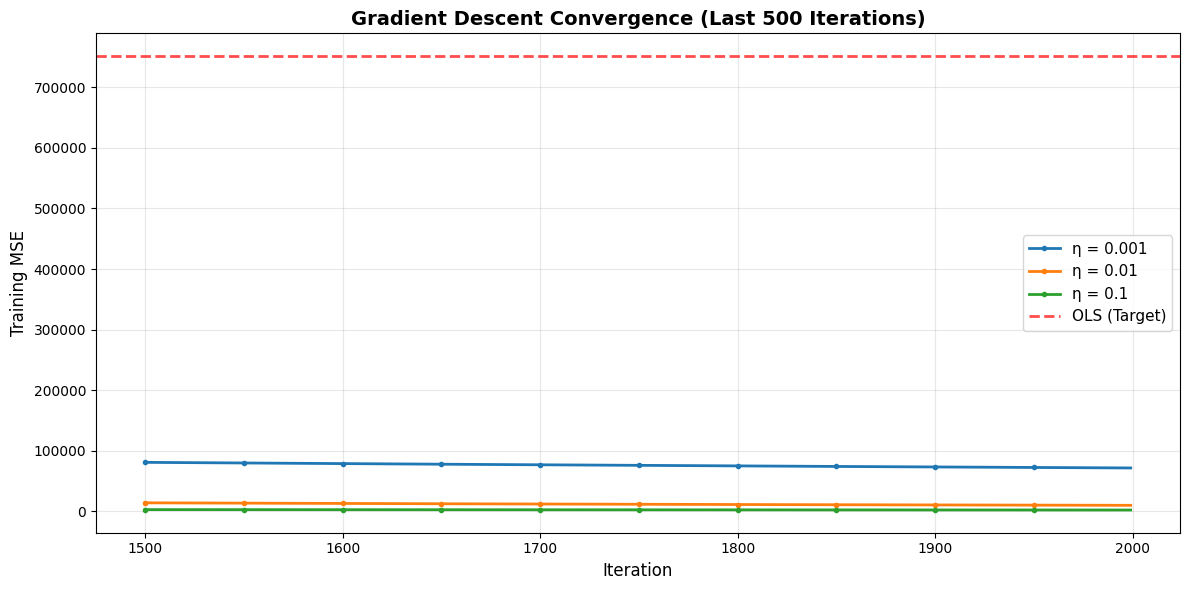

In [139]:
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    mse_history = results[lr]['mse_history']
    plt.plot(range(1500, 2000), mse_history[1500:], label=f'η = {lr}', linewidth=2, marker='o', markersize=3, markevery=50)

# Add OLS reference line
plt.axhline(y=mse_ols, color='red', linestyle='--', linewidth=2, label='OLS (Target)', alpha=0.7)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Training MSE', fontsize=12)
plt.title('Gradient Descent Convergence (Last 500 Iterations)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Why Feature Standardization Affects Learning Rate Stability

Without standardization, features have different scales, causing gradients to have vastly different magnitudes. A single learning rate cannot optimize all features because if n is large enough for small scale features, large-scale features overshoot and diverge. On the other hand, if n is small enough for large-scale features, small-scale features converge extremely slowly. With standardization, all features are on the same scales, gradients have magnitudes and the loss surface becaomes sphericial. This allows one learning rate to work uniformly well for all dimensions.

## Convergence Behavior for Different Learning Rates

The results show that n = 0.1 achieves the best convergence, reducing MSE from 7,587,222 to 2,375 in 2000 interations. In contrast, n = 0.001 only reaches MSE = 10,143 and n = 0.001 barley made any progress. But all three learning rates showed continuous improvement with 2000 interations.

# Final Model Selection

I recommend the Ridge Regression model with a = 1 as the final model.

Test Performance Summary:
- Ridge: Test RMSE = 55.70
- Lasso: Test RMSE = 77.74
- Baseline OLS: Test RMSE = 387.60
- Engineered OLS: Test RMSE = 381.16

Baseline and Engineered OLS are rejected due to high variance. We can see that with Train RMSE is near 0-26 but Test is at 380. Big train-test gap indicating the model memorized training noised but with a limited amount of data, it creates low bias but high variance. With Lasso, we see there's more bias in this because it took out 73% of featurs which oversimplifies since the dataset is small. Lastly with Ridge, it achieves the best bias-variance tradeoff, small train-test gap of 18.78 and 85% improvement in test error vs baseline OLS.

Overall, Ridge Regression minimizes total predicition error by introducing a smaller amount of bias to achieve a large reduction in variance. Ridge Regularization controls variance while maintaning a good predcitive accuracy. With the lowest model that was tested, Test RMSE = 56.70.

# Business Recommendation
According the the analysis of 12 apartment listings, there are three factors that would mostly impact monthly rent.

Startng off with apartment age. The Older the property the lower the rent. Each additional year of building age reduces rent by approximately 200 - 300. The second thing, layout and size. Larger aparments and those with more bedrooms come with premiium rents. The interaction with square footage and bedroom count is important like a 2 bedroom apartment at 800 sq ft commands more rent than 1 bedroom at the same size. Lastly, location factors. Neighborhood, transit proximity, and crime index showed incosistent effects in the small sample, it may suggest less critical than property characteristics.